# Proyek Analisis Data : E-Commers Public Data Set #
- Nama : Elia Rivaldo Pasaribu
- Email : M114D4KY3039@bangkit.academy
- ID Dicoding : umaru90

## Menentukan Pertanyaan Bisnis
- Pertanyaan 1 : Bagaimana pola penjualan bulanan selama beberapa tahun terakhir?
- Pertanyaan 2 : Kategori produk dan lokasi negara bagian mana yang paling banyak dipesan?

## Library Yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline

### Data Set 1 - Customers

#### Gathering Data

In [2]:
# Read and view customers data
customers_df = pd.read_csv('C:/Users/Umaru/Documents/ya/data/olist_customers_dataset.csv')
customers_df.head(6)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC


#### Accessing Data

In [3]:
# View dimensions of dataframe
customers_df.shape

(99441, 5)

In [4]:
# View all information related to dataframe
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


#### Cleaning Data

In [5]:
# Remove columns 1 and 2
customers_df_slice = customers_df.drop(columns=["customer_unique_id", "customer_zip_code_prefix"])
customers_df_slice.head()

,customer_id,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,campinas,SP


In [6]:
# Count the number of missing values in each column
customers_df_slice.isnull().sum()

customer_id       0
customer_city     0
customer_state    0
dtype: int64

In [7]:
# Cast type from spesific column
customers_df_slice['customer_city'] = customers_df_slice['customer_city'].astype(str)
# Change the initial character in each word to Uppercase
customers_df_slice['customer_city'] = customers_df_slice['customer_city'].str.title()
# Rewrite previous value in spesific column
customers_df_slice['customer_city'] = customers_df_slice['customer_city'].str.replace("_", " ")
customers_df_slice.head()

,customer_id,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,Franca,SP
1,18955e83d337fd6b2def6b18a428ac77,Sao Bernardo Do Campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,Sao Paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,Mogi Das Cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,Campinas,SP


In [8]:
# Check if there any duplicate value
customers_df_slice.duplicated().sum()

0

### Data Set 2 - Order

#### Gathering Data

In [9]:
# Read and view orders data
orders_df = pd.read_csv('C:/Users/Umaru/Documents/ya/data/olist_orders_dataset.csv')
orders_df.head(6)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00


#### Accessing Data

In [10]:
# View dimensions of dataframe
orders_df.shape

(99441, 8)

In [11]:
# View all information related to dataframe
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


#### Cleaning Data

In [12]:
# Count the number of missing values in each column
orders_df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [13]:
# Sort the index of orders_df
orders_df_sort = orders_df.sort_index()
# Subset rows from order_status with 'delivered' value
orders_df_sort_custom = orders_df_sort.loc[(orders_df_sort['order_status'] == 'delivered')]
orders_df_sort_custom.head(6)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00


In [14]:
# Count the number of missing values in each column
orders_df_sort_custom.isnull().sum()

order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_carrier_date      2
order_delivered_customer_date     8
order_estimated_delivery_date     0
dtype: int64

In [15]:
# Show all spesific row that have missing values
orders_df_sort_custom[orders_df_sort_custom['order_delivered_customer_date'].isnull() == True]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
3002,2d1e2d5bf4dc7227b3bfebb81328c15f,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,NaN,2017-12-18 00:00:00
20618,f5dd62b788049ad9fc0526e3ad11a097,5e89028e024b381dc84a13a3570decb4,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,NaN,2018-07-16 00:00:00
43834,2ebdfc4f15f23b91474edf87475f108e,29f0540231702fda0cfdee0a310f11aa,delivered,2018-07-01 17:05:11,2018-07-01 17:15:12,2018-07-03 13:57:00,NaN,2018-07-30 00:00:00
79263,e69f75a717d64fc5ecdfae42b2e8e086,cfda40ca8dd0a5d486a9635b611b398a,delivered,2018-07-01 22:05:55,2018-07-01 22:15:14,2018-07-03 13:57:00,NaN,2018-07-30 00:00:00
82868,0d3268bad9b086af767785e3f0fc0133,4f1d63d35fb7c8999853b2699f5c7649,delivered,2018-07-01 21:14:02,2018-07-01 21:29:54,2018-07-03 09:28:00,NaN,2018-07-24 00:00:00
92643,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,NaN,NaN,2017-06-23 00:00:00
97647,ab7c89dc1bf4a1ead9d6ec1ec8968a84,dd1b84a7286eb4524d52af4256c0ba24,delivered,2018-06-08 12:09:39,2018-06-08 12:36:39,2018-06-12 14:10:00,NaN,2018-06-26 00:00:00
98038,20edc82cf5400ce95e1afacc25798b31,28c37425f1127d887d7337f284080a0f,delivered,2018-06-27 16:09:12,2018-06-27 16:29:30,2018-07-03 19:26:00,NaN,2018-07-19 00:00:00


In [16]:
# Remove columns 4 and 5
orders_df_sort_slice = orders_df_sort_custom.drop(columns=["order_approved_at", "order_delivered_carrier_date"])
orders_df_sort_slice.head(6)

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02,2018-02-26 00:00:00
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-26 10:57:55,2017-08-01 00:00:00


In [17]:
# Converting format datetime
orders_df_sort_slice['order_purchase_timestamp'] = pd.to_datetime(orders_df_sort_slice.order_purchase_timestamp)
orders_df_sort_slice['order_delivered_customer_date'] = pd.to_datetime(orders_df_sort_slice.order_delivered_customer_date)
orders_df_sort_slice['order_estimated_delivery_date'] = pd.to_datetime(orders_df_sort_slice.order_estimated_delivery_date)
# Create new column to insert date
orders_df_sort_slice['order_purchase_date'] = orders_df_sort_slice['order_purchase_timestamp'].dt.strftime('%Y-%m-%d')
orders_df_sort_slice['order_delivered_date'] = orders_df_sort_slice['order_delivered_customer_date'].dt.strftime('%Y-%m-%d')
# View all information related to dataframe
orders_df_sort_slice.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96478 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96478 non-null  object        
 1   customer_id                    96478 non-null  object        
 2   order_status                   96478 non-null  object        
 3   order_purchase_timestamp       96478 non-null  datetime64[ns]
 4   order_delivered_customer_date  96470 non-null  datetime64[ns]
 5   order_estimated_delivery_date  96478 non-null  datetime64[ns]
 6   order_purchase_date            96478 non-null  object        
 7   order_delivered_date           96470 non-null  object        
dtypes: datetime64[ns](3), object(5)
memory usage: 6.6+ MB


In [18]:
# Remove columns 6
orders_df_sort_slice_new = orders_df_sort_slice.drop(columns=["order_delivered_customer_date"])
# Converting format datetime
orders_df_sort_slice_new['order_purchase_date'] = pd.to_datetime(orders_df_sort_slice.order_purchase_date)
orders_df_sort_slice_new['order_delivered_date'] = pd.to_datetime(orders_df_sort_slice.order_delivered_date)
# Count the number of missing values in each column
orders_df_sort_slice_new.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_estimated_delivery_date    0
order_purchase_date              0
order_delivered_date             8
dtype: int64

In [19]:
# Replacing the missing date column with backfill method
orders_df_new_bfil = orders_df_sort_slice_new.copy()
orders_df_new_bfil['order_delivered_date'].fillna(method='bfill', inplace=True)
orders_df_new_bfil.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_estimated_delivery_date    0
order_purchase_date              0
order_delivered_date             0
dtype: int64

In [20]:
# Check if there any duplicate value
orders_df_new_bfil.duplicated().sum()

0

### Data Set 3 - Order Payment

#### Gathering Data

In [21]:
# Read and view order-payment data
order_payments_df = pd.read_csv("C:/Users/Umaru/Documents/ya/data/olist_order_payments_dataset.csv")
order_payments_df.head(6)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
5,298fcdf1f73eb413e4d26d01b25bc1cd,1,credit_card,2,96.12


#### Accessing Data

In [22]:
# View dimensions of dataframe
order_payments_df.shape

(103886, 5)

In [23]:
# View all information related to dataframe
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


#### Cleaning Data

In [24]:
# Remove columns 4 and 5
order_payments_df_slice = order_payments_df.drop(columns=["payment_sequential", "payment_installments"])
order_payments_df_slice.head()

,order_id,payment_type,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,credit_card,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,credit_card,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,credit_card,65.71
3,ba78997921bbcdc1373bb41e913ab953,credit_card,107.78
4,42fdf880ba16b47b59251dd489d4441a,credit_card,128.45


In [25]:
# Count the number of missing values in each column
order_payments_df_slice.isnull().sum()

order_id         0
payment_type     0
payment_value    0
dtype: int64

In [26]:
# Cast type from spesific column
order_payments_df_slice['payment_type'] = order_payments_df_slice['payment_type'].astype(str)
# Change the initial character in each word to Uppercase
order_payments_df_slice['payment_type'] = order_payments_df_slice['payment_type'].str.title()
# Rewrite previous value in spesific column
order_payments_df_slice['payment_type'] = order_payments_df_slice['payment_type'].str.replace("_", " ")
order_payments_df_slice
# Check if there any duplicate value
order_payments_df_slice.duplicated().sum()

615

In [27]:
# Remove duplicated value
order_payments_df_slice.drop_duplicates(inplace=True)
# Check if there any duplicate value
order_payments_df_slice.duplicated().sum()

0

### Data Set 4 - Order Item

#### Gathering Data

In [28]:
# Read and view order-item data
order_items_df = pd.read_csv("C:/Users/Umaru/Documents/ya/data/olist_order_items_dataset.csv")
order_items_df.head(6)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69


#### Accessing Data

In [29]:
# View dimensions of dataframe
order_items_df.shape

(112650, 7)

In [30]:
# View all information related to dataframe
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


#### Cleaning Data

In [31]:
# Remove columns 1,4, 5 and 6
order_items_df_sort_slice = order_items_df.drop(columns=["order_item_id", "shipping_limit_date", "freight_value", 'price'])
order_items_df_sort_slice.head()

,order_id,product_id,seller_id
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87


In [32]:
# Count the number of missing values in each column
order_items_df_sort_slice.isnull().sum()

order_id      0
product_id    0
seller_id     0
dtype: int64

In [33]:
# Check if there any duplicate value
order_items_df_sort_slice.duplicated().sum()

10225

In [34]:
# Remove duplicated value
order_items_df_sort_slice.drop_duplicates(inplace=True)
# Check if there any duplicate value
order_items_df_sort_slice.duplicated().sum()

0

### Data Set 5 - Product

#### Gathering Data

In [35]:
# Read and view product data
products_df = pd.read_csv("C:/Users/Umaru/Documents/ya/data/olist_products_dataset.csv")
products_df.head(6)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
5,41d3672d4792049fa1779bb35283ed13,instrumentos_musicais,60.0,745.0,1.0,200.0,38.0,5.0,11.0


#### Accessing Data

In [36]:
# View dimensions of dataframe
products_df.shape

(32951, 9)

In [37]:
# View all information related to dataframe
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


#### Cleaning Data

In [38]:
# Use slicing to get columns 1 to 2
products_df_slice = products_df.iloc[:,:2]
products_df_slice.head()

,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria
1,3aa071139cb16b67ca9e5dea641aaa2f,artes
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer
3,cef67bcfe19066a932b7673e239eb23d,bebes
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas


In [39]:
# Customize product_category_name value
products_df_slice['product_category_name'] = products_df_slice['product_category_name'].astype(str)
products_df_slice['product_category_name'] = products_df_slice['product_category_name'].str.title()
products_df_slice['product_category_name'] = products_df_slice['product_category_name'].str.replace("_", " ")
products_df_slice.head()

,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,Perfumaria
1,3aa071139cb16b67ca9e5dea641aaa2f,Artes
2,96bd76ec8810374ed1b65e291975717f,Esporte Lazer
3,cef67bcfe19066a932b7673e239eb23d,Bebes
4,9dc1a7de274444849c219cff195d0b71,Utilidades Domesticas


In [40]:
# Count the number of missing values in each column
products_df_slice.isnull().sum()

product_id               0
product_category_name    0
dtype: int64

In [41]:
# Check if there any duplicate value
products_df_slice.duplicated().sum()

0

### Data Set 6 - Seller

#### Gathering Data

In [42]:
# Read and view seller data
sellers_df = pd.read_csv("C:/Users/Umaru/Documents/ya/data/olist_sellers_dataset.csv")
sellers_df.head(6)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
5,c240c4061717ac1806ae6ee72be3533b,20920,rio de janeiro,RJ


#### Accessing Data

In [43]:
# View dimensions of dataframe
sellers_df.shape

(3095, 4)

In [44]:
# View all information related to dataframe
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [45]:
# Count the number of missing values in each column
sellers_df.isnull().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [46]:
# Use slicing to get columns 1 to 2
sellers_df_slice = sellers_df.iloc[:,:2]
sellers_df_slice.head()

,seller_id,seller_zip_code_prefix
0,3442f8959a84dea7ee197c632cb2df15,13023
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195
4,51a04a8a6bdcb23deccc82b0b80742cf,12914


#### Cleaning Data

In [47]:
# Use slicing to get columns 1 to 2
sellers_df_slice = sellers_df.iloc[:, :2]
# Check if there any duplicate value
sellers_df_slice.duplicated().sum()

0

In [48]:
# Customize seller_city value
sellers_df_slice['seller_city'] = sellers_df['seller_city'].astype(str)
sellers_df_slice['seller_city'] = sellers_df_slice['seller_city'].str.title()
sellers_df_slice['seller_city'] = sellers_df_slice['seller_city'].str.replace("_", " ")
sellers_df_slice.head()

,seller_id,seller_zip_code_prefix,seller_city
0,3442f8959a84dea7ee197c632cb2df15,13023,Campinas
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,Mogi Guacu
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,Rio De Janeiro
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,Sao Paulo
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,Braganca Paulista


In [49]:
# Check if there any duplicate value
sellers_df_slice.duplicated().sum()

0

### Data Set 7 - Order Reviews

#### Gathering Data

In [50]:
# Read and view order reviews data
order_reviews_df = pd.read_csv("C:/Users/Umaru/Documents/ya/data/olist_order_reviews_dataset.csv")
order_reviews_df.head(6)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37


#### Accessing Data

In [51]:
# View dimensions of dataframe
order_reviews_df.shape

(99224, 7)

In [52]:
# View all information related to dataframe
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [53]:
# Count the number of missing values in each column
order_reviews_df.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

### Data Set 8 - Product Category

#### Gathering Data

In [54]:
# Read and view product category name translation data
product_category_translation_df = pd.read_csv("C:/Users/Umaru/Documents/ya/data/product_category_name_translation.csv")
product_category_translation_df.head(6)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
5,esporte_lazer,sports_leisure


#### Accessing Data

In [55]:
# View dimensions of dataframe
product_category_translation_df.shape

(71, 2)

In [56]:
# View all information related to dataframe
product_category_translation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [57]:
# Count the number of missing values in each column
product_category_translation_df.isnull().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

### Data Set 9 - Geo Location

#### Gathering Data

In [58]:
# Read and view geolocation data
geolocation_df = pd.read_csv("C:/Users/Umaru/Documents/ya/data/olist_geolocation_dataset.csv")
geolocation_df.head(6)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
5,1012,-23.547762,-46.635361,são paulo,SP


#### Accessing Data

In [59]:
# View dimensions of dataframe
geolocation_df.shape

(1000163, 5)

In [60]:
# View all information related to dataframe
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [61]:
# Count the number of missing values in each column
geolocation_df.isnull().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

## Data Manipulation

In [62]:
orders_df_new_bfil.info()

# Copy existing dataFrame into new dataFrame
order_df_new = orders_df_new_bfil.copy()
# Extracting attributes for Order date - Year and Month
order_df_new['order_date_year'] = order_df_new['order_purchase_date'].apply(lambda x: x.year)
order_df_new['order_date_month'] = order_df_new['order_purchase_date'].apply(lambda x: x.month)
order_df_new['month-year'] = order_df_new['order_purchase_date'].dt.strftime('%B') + '-' + order_df_new['order_purchase_date'].dt.strftime('%Y')
# Extracting attributes for Order date - day
order_df_new['order_date_day'] = order_df_new['order_purchase_date'].dt.day_name()
display(order_df_new.head(6))

<class 'pandas.core.frame.DataFrame'>
Index: 96478 entries, 0 to 99440
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96478 non-null  object        
 1   customer_id                    96478 non-null  object        
 2   order_status                   96478 non-null  object        
 3   order_purchase_timestamp       96478 non-null  datetime64[ns]
 4   order_estimated_delivery_date  96478 non-null  datetime64[ns]
 5   order_purchase_date            96478 non-null  datetime64[ns]
 6   order_delivered_date           96478 non-null  datetime64[ns]
dtypes: datetime64[ns](4), object(3)
memory usage: 5.9+ MB


,order_id,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,order_purchase_date,order_delivered_date,order_date_year,order_date_month,month-year,order_date_day
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-18,2017-10-02,2017-10-10,2017,10,October-2017,Monday
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-13,2018-07-24,2018-08-07,2018,7,July-2018,Tuesday
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-09-04,2018-08-08,2018-08-17,2018,8,August-2018,Wednesday
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-15,2017-11-18,2017-12-02,2017,11,November-2017,Saturday
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-26,2018-02-13,2018-02-16,2018,2,February-2018,Tuesday
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-08-01,2017-07-09,2017-07-26,2017,7,July-2017,Sunday


## Join Data Frame

In [63]:
# Combine all custom table into 1 dataFrame
order_cust_df = order_df_new.merge(customers_df_slice, on='customer_id')
order_cust_payment_df = order_cust_df.merge(order_payments_df_slice, on='order_id')
order_cust_payment_item_df = order_cust_payment_df.merge(order_items_df_sort_slice, on='order_id')
order_cust_payment_item_product_df = order_cust_payment_item_df.merge(products_df_slice, on='product_id')
ecommerce_df = order_cust_payment_item_product_df.copy()

ecommerce_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104059 entries, 0 to 104058
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       104059 non-null  object        
 1   customer_id                    104059 non-null  object        
 2   order_status                   104059 non-null  object        
 3   order_purchase_timestamp       104059 non-null  datetime64[ns]
 4   order_estimated_delivery_date  104059 non-null  datetime64[ns]
 5   order_purchase_date            104059 non-null  datetime64[ns]
 6   order_delivered_date           104059 non-null  datetime64[ns]
 7   order_date_year                104059 non-null  int64         
 8   order_date_month               104059 non-null  int64         
 9   month-year                     104059 non-null  object        
 10  order_date_day                 104059 non-null  object        
 11  

## Exploration Data Analytics (EDA)

### Descriptive Statistic

In [64]:
ecommerce_df.info()

# View details of descriptive statistic
ecommerce_df[['payment_value']].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104059 entries, 0 to 104058
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       104059 non-null  object        
 1   customer_id                    104059 non-null  object        
 2   order_status                   104059 non-null  object        
 3   order_purchase_timestamp       104059 non-null  datetime64[ns]
 4   order_estimated_delivery_date  104059 non-null  datetime64[ns]
 5   order_purchase_date            104059 non-null  datetime64[ns]
 6   order_delivered_date           104059 non-null  datetime64[ns]
 7   order_date_year                104059 non-null  int64         
 8   order_date_month               104059 non-null  int64         
 9   month-year                     104059 non-null  object        
 10  order_date_day                 104059 non-null  object        
 11  

,payment_value
count,104059.000000
mean,157.425589
std,217.558816
min,0.000000
25%,58.245000
50%,102.790000
75%,176.230000
max,13664.080000


### Income Data (Tahun)

In [65]:
# Check total income of the store per year
yearly_income_total = ecommerce_df.groupby(by='order_date_year').agg(grand_total = ('payment_value', pd.Series.sum))
yearly_income_total = yearly_income_total.sort_values(by = ['grand_total'], ascending=False)
yearly_income_total

,grand_total
order_date_year,
2018,8986446.15
2017,7345202.22
2016,49901.04


### Income Data (Bulan)

In [66]:
# Check total income of the store per year
monthly_income_total = ecommerce_df.groupby(by='order_date_month').agg(grand_total = ('payment_value', pd.Series.sum))
monthly_income_total = monthly_income_total.sort_values(by = ['order_date_month'], ascending=True)
monthly_income_total

,grand_total
order_date_month,
1,1283996.72
2,1293346.96
3,1610651.44
4,1618050.54
5,1815660.64
6,1594574.59
7,1693746.70
8,1752700.57
9,735750.74


### Perkembangan Sales/Tahun dan Bulan

In [67]:
# Calculate all the order_id per month & year
group_columns = ['order_date_year', 'order_date_month', 'month-year']
year_monthly_order = ecommerce_df.groupby(group_columns)['order_id'].nunique().reset_index()
year_monthly_order

,order_date_year,order_date_month,month-year,order_id
0,2016,10,October-2016,265
1,2016,12,December-2016,1
2,2017,1,January-2017,750
3,2017,2,February-2017,1653
4,2017,3,March-2017,2546
5,2017,4,April-2017,2303
6,2017,5,May-2017,3546
7,2017,6,June-2017,3135
8,2017,7,July-2017,3872
9,2017,8,August-2017,4193


### Total Order/Tahun & Bulan

In [68]:
# Calculate all the order_id per month & year
group_columns = ['order_date_year', 'order_date_month', 'month-year']
year_monthly_order = ecommerce_df.groupby(group_columns)['order_id'].nunique().reset_index()
year_monthly_order

,order_date_year,order_date_month,month-year,order_id
0,2016,10,October-2016,265
1,2016,12,December-2016,1
2,2017,1,January-2017,750
3,2017,2,February-2017,1653
4,2017,3,March-2017,2546
5,2017,4,April-2017,2303
6,2017,5,May-2017,3546
7,2017,6,June-2017,3135
8,2017,7,July-2017,3872
9,2017,8,August-2017,4193


### Data Kategori Produk, Order, dan Sales

In [69]:
# Product with top sales
grouped_data = ecommerce_df.groupby('product_category_name').agg(
    num_of_order=pd.NamedAgg(column='order_id', aggfunc='nunique'),
    sales=pd.NamedAgg(column='payment_value', aggfunc='sum')
).reset_index()

grouped_data = grouped_data.sort_values(by = ['num_of_order'], ignore_index = True, ascending=False)
grouped_data.head(5)

,product_category_name,num_of_order,sales
0,Cama Mesa Banho,9272,1435791.24
1,Beleza Saude,8646,1462953.30
2,Esporte Lazer,7530,1163678.04
3,Informatica Acessorios,6530,1119109.32
4,Moveis Decoracao,6307,998647.23


### Data Order dan Tipe Pembayaran

In [70]:
# Check variety of payment type from customer transaction by order id
payment_order = ecommerce_df.groupby(by='payment_type')['order_id'].count().reset_index()
payment_order = payment_order.sort_values(by = ['order_id'],ascending=False)
payment_order

,payment_type,order_id
1,Credit Card,77538
0,Boleto,19853
3,Voucher,5120
2,Debit Card,1548


## Explore Data Analytics

#### Pertanyaan 1 : Bagaimana pola penjualan bulanan selama beberapa tahun terakhir?

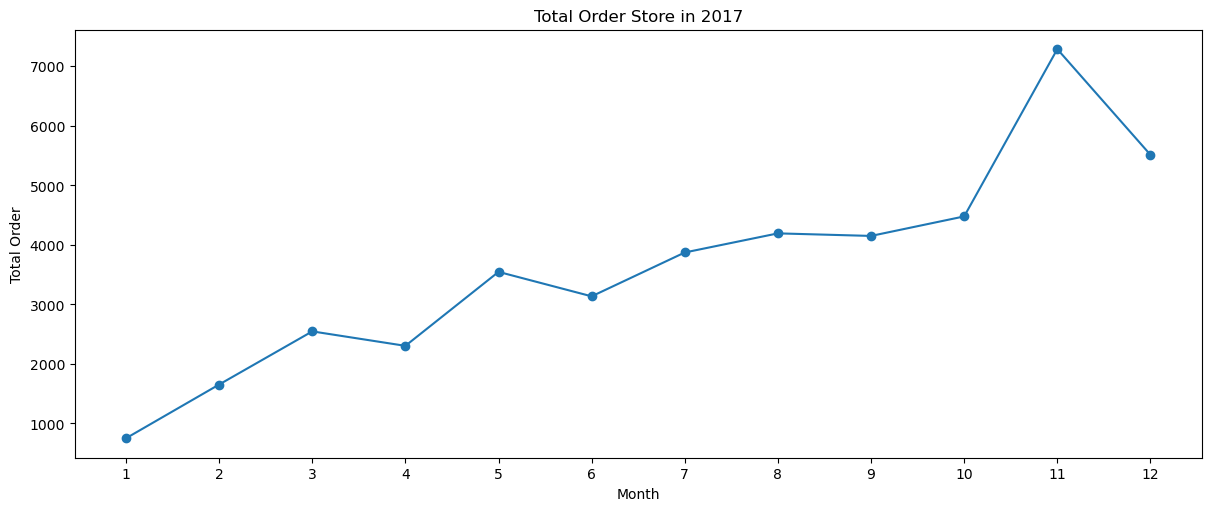

In [71]:
year_monthly_order_2017 = year_monthly_order[year_monthly_order['order_date_year'] == 2017]
year_monthly_order_2018 = year_monthly_order[year_monthly_order['order_date_year'] == 2018]

# Adjust the figure size
plt.figure(constrained_layout=True, figsize=(12, 5))

# Create a line chart
plt.plot(year_monthly_order_2017['order_date_month'], year_monthly_order_2017['order_id'], marker='o')
plt.xticks(year_monthly_order_2017['order_date_month'])

# Set subplot properties
plt.title('Total Order Store in 2017')
plt.ylabel('Total Order');
plt.xlabel('Month')
plt.show()

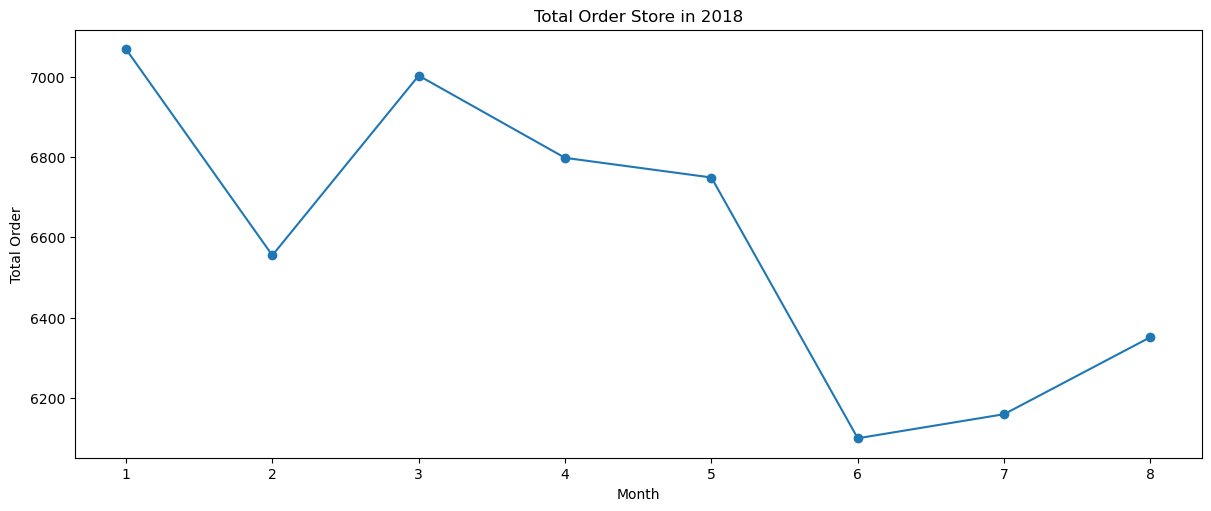

In [72]:
# Adjust the figure size
plt.figure(constrained_layout=True, figsize=(12, 5))

# Create a line chart
plt.plot(year_monthly_order_2018['order_date_month'], year_monthly_order_2018['order_id'], marker='o')
plt.xticks(year_monthly_order_2018['order_date_month'])

# Set subplot properties
plt.title('Total Order Store in 2018')
plt.ylabel('Total Order');
plt.xlabel('Month')
plt.show()

#### Pertanyaan 2 : Kategori produk dan lokasi negara bagian mana yang paling banyak dipesan?

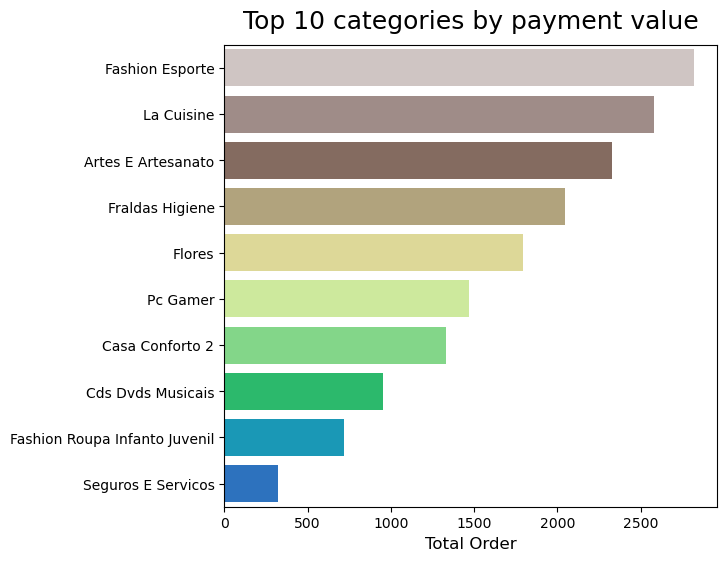

In [73]:
southeast_area = ['SP', 'RJ', 'ES','MG']
northeast_area = ['MA', 'PI', 'CE', 'RN', 'PE', 'PB', 'SE', 'AL', 'BA']
north_area =  ['AM', 'RR', 'AP', 'PA', 'TO', 'RO', 'AC']
cent_west_area = ['MT', 'GO', 'MS' ,'DF' ]
south_area = ['SC', 'RS', 'PR']
ecommerce_df.loc[ecommerce_df['customer_state'].isin(southeast_area), 'customer_Region'] = 'Southeast'
ecommerce_df.loc[ecommerce_df['customer_state'].isin(northeast_area), 'customer_Region'] = 'Northeast'
ecommerce_df.loc[ecommerce_df['customer_state'].isin(north_area), 'customer_Region'] = 'North'
ecommerce_df.loc[ecommerce_df['customer_state'].isin(cent_west_area), 'customer_Region'] = 'Centwest'
ecommerce_df.loc[ecommerce_df['customer_state'].isin(south_area), 'customer_Region'] = 'South'

# Adjust the figure size
plt.figure(figsize = (14, 6))

# Plot num-1: Top categories by total order
plt.subplot(1,2,1)

# Calculate total order for each category
data_group_1 = ecommerce_df.groupby(['product_category_name'], as_index = False)['payment_value'].sum().sort_values('payment_value', ignore_index = True, ascending=False).tail(10)

# Create bar plot
sns.barplot(data = data_group_1, x = 'payment_value', y = 'product_category_name', palette = 'terrain_r')

# Setting some visual options
plt.ylabel(None)
plt.xlabel('Total Order', fontdict = {'fontsize': 12})
plt.title('Top 10 categories by payment value', fontdict = {'fontsize': 18}, pad = 12)
plt.show()

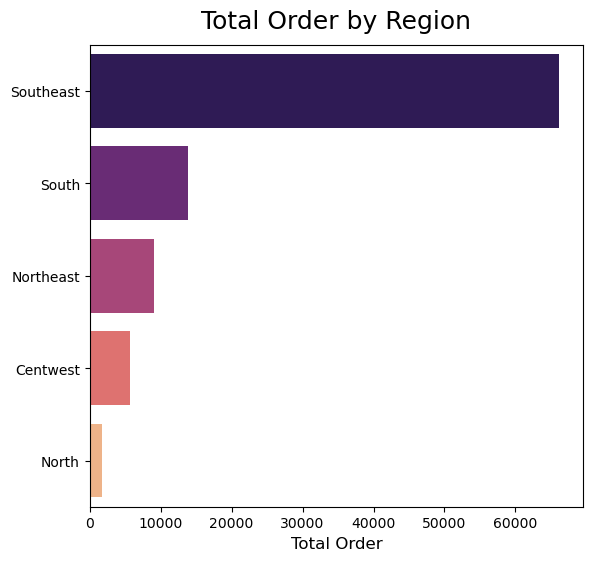

In [74]:
# Adjust the figure size
plt.figure(figsize = (14, 6))

# Plot num-1: Rank region by total order
plt.subplot(1,2,1)

# Calculate total order for each region
data_group_2 = ecommerce_df.groupby('customer_Region').agg(
    num_of_order=pd.NamedAgg(column='order_id', aggfunc='nunique')
).reset_index()

data_group_2 = data_group_2.sort_values(by = ['num_of_order'], ignore_index = True, ascending=False).head(10)

# Create bar plot
sns.barplot(data = data_group_2, x = 'num_of_order', y = 'customer_Region', palette = 'magma')

# Setting some visual options
plt.ylabel(None)
plt.xlabel('Total Order', fontdict = {'fontsize': 12})
plt.title('Total Order by Region', fontdict = {'fontsize': 18}, pad = 12)
plt.show()

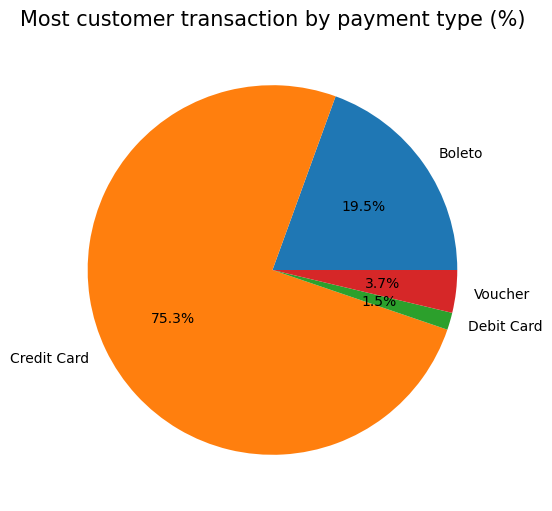

In [75]:
# Calculate all the order_id per day & order_date_day
group_order_day = ecommerce_df.groupby('order_date_day')['order_id'].nunique()
group_order_day = pd.DataFrame(group_order_day)
group_order_day.reset_index(inplace=True)
group_order_day = group_order_day.sort_values(by = ['order_id'], ascending=False)
group_order_day.head()

# Calculate all the order_id per day & payment type
group_payment_day = ecommerce_df.groupby('payment_type')['order_id'].nunique()

# Convert all the order_id into %
payment_day_percentage = (group_payment_day / ecommerce_df['order_id'].nunique() * 100).round(2)
payment_day_percentage = pd.DataFrame(payment_day_percentage)
payment_day_percentage.reset_index(inplace=True)
payment_day_percentage

# Adjust the figure size
plt.figure(figsize = (14, 6))

# Create pie plot
plt.pie(payment_day_percentage['order_id'], labels = payment_day_percentage['payment_type'], autopct='%1.1f%%')

# Setting some visual options
plt.title('Most customer transaction by payment type (%)', fontdict = {'fontsize': 15}, pad = 10)
plt.show()

Number of unique sellers: 3095
Distribution of sellers by state:
 seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
CE      13
PE       9
PB       6
RN       5
MS       5
MT       4
RO       2
SE       2
PI       1
AC       1
MA       1
AM       1
PA       1
Name: count, dtype: int64


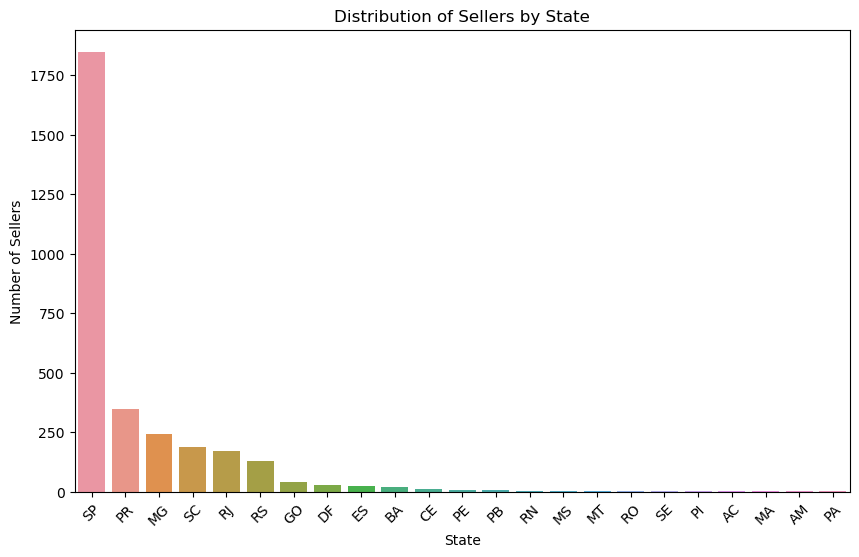

In [76]:
# Check the number of unique seller IDs
num_unique_sellers = sellers_df['seller_id'].nunique()
print("Number of unique sellers:", num_unique_sellers)

# Check the distribution of seller states
seller_state_distribution = sellers_df['seller_state'].value_counts()
print("Distribution of sellers by state:\n", seller_state_distribution)

# Visualize the distribution of sellers by state
plt.figure(figsize=(10, 6))
sns.countplot(data=sellers_df, x='seller_state', order=sellers_df['seller_state'].value_counts().index)
plt.title('Distribution of Sellers by State')
plt.xlabel('State')
plt.ylabel('Number of Sellers')
plt.xticks(rotation=45)
plt.show()

Top selling states by sellers:
 seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
Name: count, dtype: int64


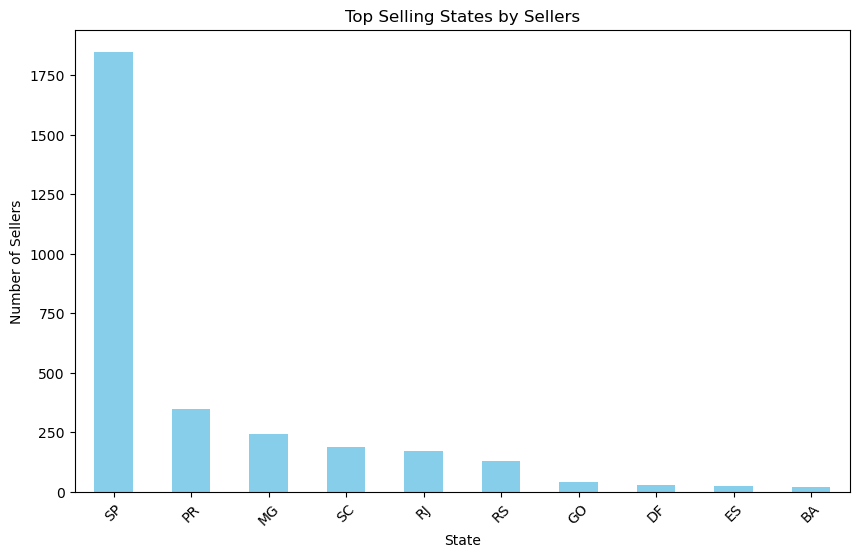

In [77]:
# Check the top-selling states by sellers
top_selling_states = sellers_df['seller_state'].value_counts().head(10)
print("Top selling states by sellers:\n", top_selling_states)

# Visualize the top-selling states by sellers
plt.figure(figsize=(10, 6))
top_selling_states.plot(kind='bar', color='skyblue')
plt.title('Top Selling States by Sellers')
plt.xlabel('State')
plt.ylabel('Number of Sellers')
plt.xticks(rotation=45)
plt.show()

Number of unique reviews: 98410
Distribution of review scores:
 review_score
5    57328
4    19142
1    11424
3     8179
2     3151
Name: count, dtype: int64


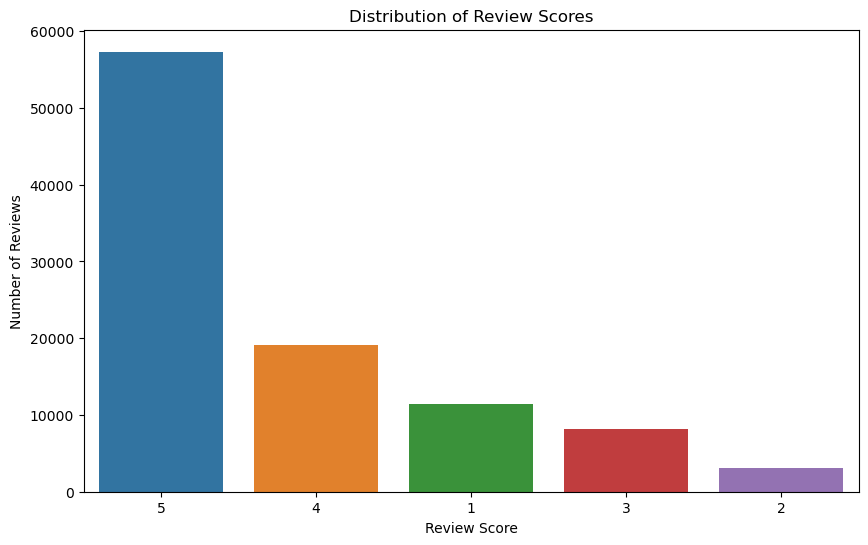

In [78]:
# Check the number of unique review IDs
num_unique_reviews = order_reviews_df['review_id'].nunique()
print("Number of unique reviews:", num_unique_reviews)

# Check the distribution of review scores
review_scores_distribution = order_reviews_df['review_score'].value_counts()
print("Distribution of review scores:\n", review_scores_distribution)

# Visualize the distribution of review scores
plt.figure(figsize=(10, 6))
sns.countplot(data=order_reviews_df, x='review_score', order=order_reviews_df['review_score'].value_counts().index)
plt.title('Distribution of Review Scores')
plt.xlabel('Review Score')
plt.ylabel('Number of Reviews')
plt.show()

Top reasons for negative reviews:
 review_comment_title
Não recomendo           51
Ruim                    45
não recomendo           41
Produto errado          35
Não recebi o produto    33
Produto com defeito     29
Produto não entregue    29
Péssimo                 16
Péssimo                 15
Não recebi              14
Name: count, dtype: int64


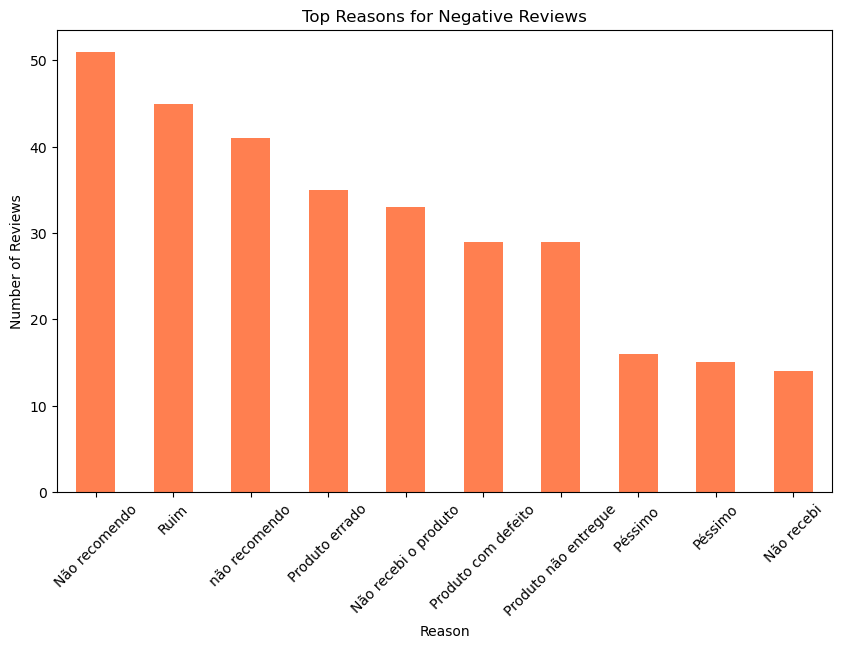

In [79]:
# Check the top reasons for negative reviews
top_negative_reasons = order_reviews_df[order_reviews_df['review_score'] < 3]['review_comment_title'].value_counts().head(10)
print("Top reasons for negative reviews:\n", top_negative_reasons)

# Visualize the top reasons for negative reviews
plt.figure(figsize=(10, 6))
top_negative_reasons.plot(kind='bar', color='coral')
plt.title('Top Reasons for Negative Reviews')
plt.xlabel('Reason')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()

Number of unique categories: 71
Distribution of categories by translation:
 product_category_name
beleza_saude                        1
alimentos                           1
fashion_esporte                     1
fashion_underwear_e_moda_praia      1
construcao_ferramentas_seguranca    1
                                   ..
malas_acessorios                    1
cool_stuff                          1
fashion_calcados                    1
audio                               1
seguros_e_servicos                  1
Name: count, Length: 71, dtype: int64


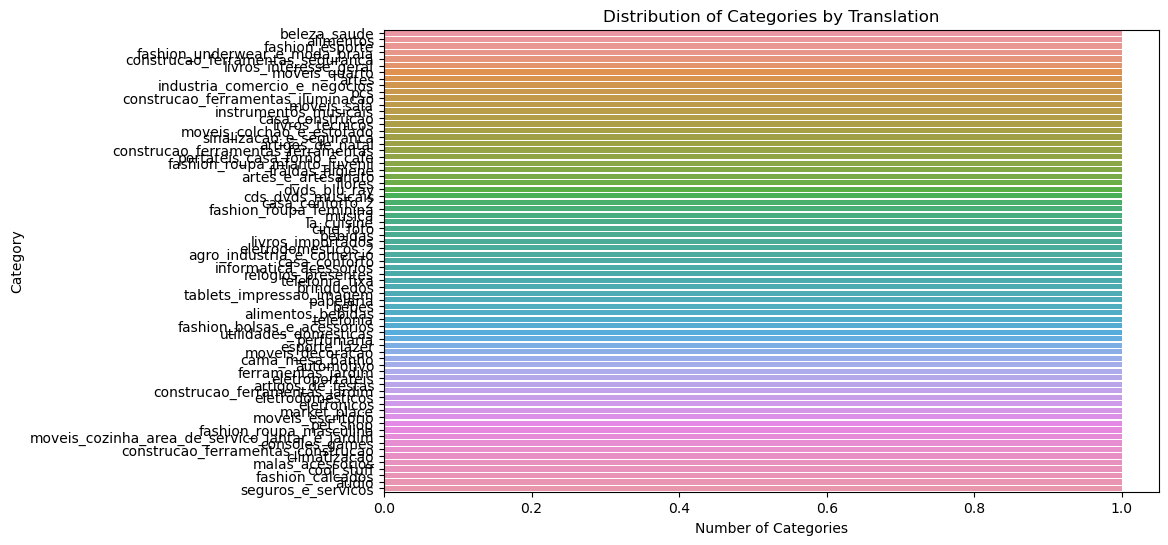

In [80]:
# Check the number of unique categories
num_unique_categories = product_category_translation_df['product_category_name'].nunique()
print("Number of unique categories:", num_unique_categories)

# Check the distribution of categories by translation
category_translation_distribution = product_category_translation_df['product_category_name'].value_counts()
print("Distribution of categories by translation:\n", category_translation_distribution)

# Visualize the distribution of categories by translation
plt.figure(figsize=(10, 6))
sns.countplot(data=product_category_translation_df, y='product_category_name', order=product_category_translation_df['product_category_name'].value_counts().index)
plt.title('Distribution of Categories by Translation')
plt.xlabel('Number of Categories')
plt.ylabel('Category')
plt.show()

Number of unique locations: 19015
Distribution of locations by state:
 geolocation_state
SP    404268
MG    126336
RJ    121169
RS     61851
PR     57859
SC     38328
BA     36045
GO     20139
ES     16748
PE     16432
DF     12986
MT     12031
CE     11674
PA     10853
MS     10431
MA      7853
PB      5538
RN      5041
PI      4549
AL      4183
TO      3576
SE      3563
RO      3478
AM      2432
AC      1301
AP       853
RR       646
Name: count, dtype: int64


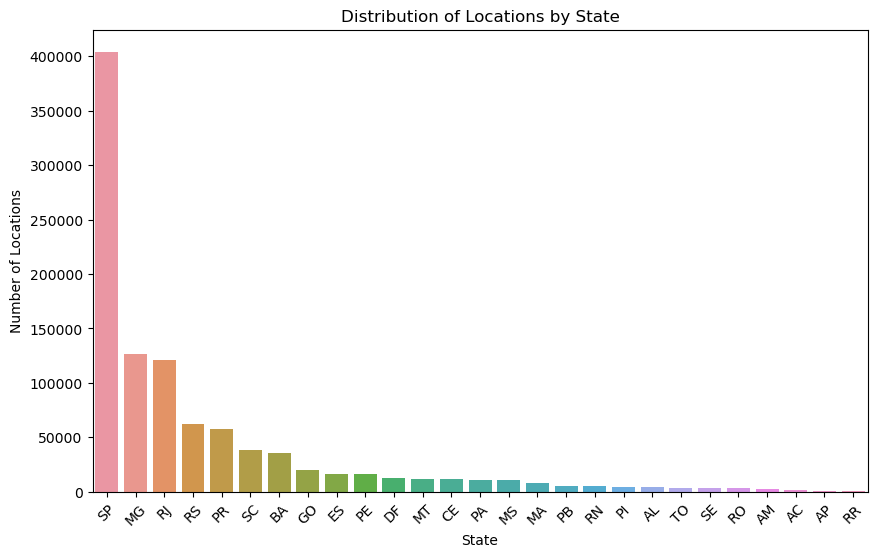

In [81]:
# Check the number of unique locations
num_unique_locations = geolocation_df['geolocation_zip_code_prefix'].nunique()
print("Number of unique locations:", num_unique_locations)

# Check the distribution of locations by state
location_state_distribution = geolocation_df['geolocation_state'].value_counts()
print("Distribution of locations by state:\n", location_state_distribution)

# Visualize the distribution of locations by state
plt.figure(figsize=(10, 6))
sns.countplot(data=geolocation_df, x='geolocation_state', order=geolocation_df['geolocation_state'].value_counts().index)
plt.title('Distribution of Locations by State')
plt.xlabel('State')
plt.ylabel('Number of Locations')
plt.xticks(rotation=45)
plt.show()

Top zip code prefixes with the most locations:
 geolocation_zip_code_prefix
24220    1146
24230    1102
38400     965
35500     907
11680     879
22631     832
30140     810
11740     788
38408     773
28970     743
Name: count, dtype: int64


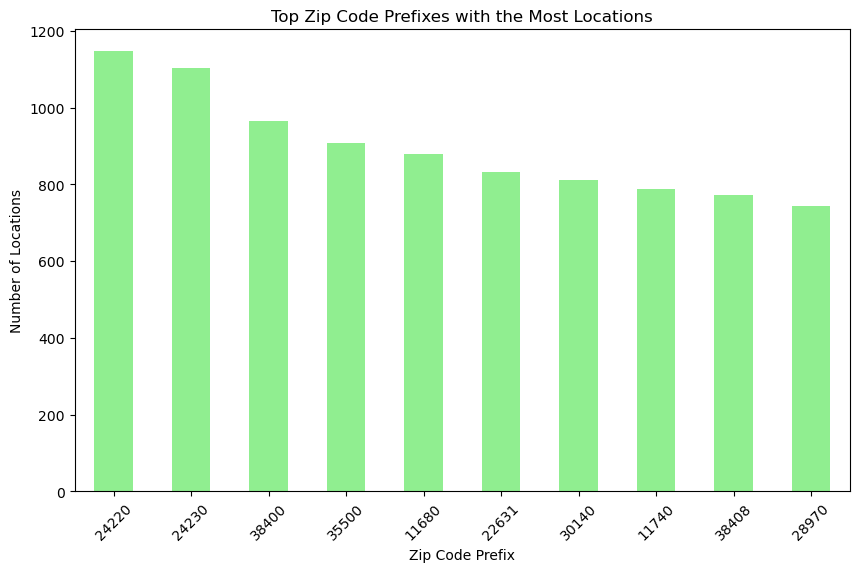

In [82]:
# Check the top zip code prefixes with the most locations
top_zip_code_prefixes = geolocation_df['geolocation_zip_code_prefix'].value_counts().head(10)
print("Top zip code prefixes with the most locations:\n", top_zip_code_prefixes)

# Visualize the top zip code prefixes with the most locations
plt.figure(figsize=(10, 6))
top_zip_code_prefixes.plot(kind='bar', color='lightgreen')
plt.title('Top Zip Code Prefixes with the Most Locations')
plt.xlabel('Zip Code Prefix')
plt.ylabel('Number of Locations')
plt.xticks(rotation=45)
plt.show()

## Recency, Frequency, and Monetary (RFM)

### Data Preparation

In [83]:
# Copy existing dataFrame into new dataFrame
new_orders_df = orders_df_sort_custom.copy()
# Use slicing to get columns 1 to 3
new_orders_df_slice = new_orders_df.iloc[:,:4]
# Subset rows from order_status with 'delivered' value
new_orders_df_slice = new_orders_df_slice.loc[(new_orders_df_slice['order_status'] == 'delivered')]
# Converting format datetime
new_orders_df_slice['order_purchase_timestamp'] = pd.to_datetime(new_orders_df_slice.order_purchase_timestamp)
# Count the number of missing values in each column
new_orders_df_slice.isnull().sum()

order_id                    0
customer_id                 0
order_status                0
order_purchase_timestamp    0
dtype: int64

In [84]:
# Count the number of missing values in each column
new_orders_df_slice.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96478 entries, 0 to 99440
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_id                  96478 non-null  object        
 1   customer_id               96478 non-null  object        
 2   order_status              96478 non-null  object        
 3   order_purchase_timestamp  96478 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 3.7+ MB


In [85]:
# Combine all custom table into 1 dataFrame
order_cust_df_rfm = new_orders_df_slice.merge(customers_df_slice, on='customer_id')
order_cust_pay_df_rfm = order_cust_df_rfm.merge(order_payments_df_slice, on='order_id') # use old custom order_payment dataframe
# Count the number of missing values in each column
order_cust_pay_df_rfm.head()

,order_id,customer_id,order_status,order_purchase_timestamp,customer_city,customer_state,payment_type,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,Sao Paulo,SP,Credit Card,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,Sao Paulo,SP,Voucher,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,Sao Paulo,SP,Voucher,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,Barreiras,BA,Boleto,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,Vianopolis,GO,Credit Card,179.12


In [86]:
# Count the number of missing values in each column
order_cust_pay_df_rfm.isnull().sum()

order_id                    0
customer_id                 0
order_status                0
order_purchase_timestamp    0
customer_city               0
customer_state              0
payment_type                0
payment_value               0
dtype: int64

In [87]:
# Copy existing dataFrame into new dataFrame
rfm_df = order_cust_pay_df_rfm.copy()
rfm_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,customer_city,customer_state,payment_type,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,Sao Paulo,SP,Credit Card,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,Sao Paulo,SP,Voucher,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,Sao Paulo,SP,Voucher,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,Barreiras,BA,Boleto,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,Vianopolis,GO,Credit Card,179.12


### Metrik RFM

In [88]:
# Check the last date in the order_purchase_date column by calculating the maximum value of the customer transaction date
last_date = rfm_df['order_purchase_timestamp'].max()
# Since the dataset is not the most recent, we will use max+1 instead of the current date.
current_date = last_date + dt.timedelta(days=1)
# Define current date
print(f"Current date is: {current_date}")

Current date is: 2018-08-30 15:00:37


In [89]:
# Calculate all the customer_id per day & order_purchase_timestamp
rfm_df_r = rfm_df.groupby(['customer_id'], as_index = False)['order_purchase_timestamp'].max()
# Extracting attributes from order_purchase_timestamp to new column recency
rfm_df_r['recency'] = rfm_df_r['order_purchase_timestamp'].apply(lambda x: (current_date - x)).dt.days
# Remove unuse order_purchase_timestamp
rfm_df_r.drop(columns=['order_purchase_timestamp'], inplace = True)
rfm_df_r.head(6)

# Calculate all the customer_id per day, order_id, and payment_value and change the column name
rfm_df_fm = rfm_df.groupby('customer_id').agg(
    frequency=pd.NamedAgg(column='order_id', aggfunc='count'),
    monetary=pd.NamedAgg(column='payment_value', aggfunc='sum')
).reset_index()
rfm_df_fm.head(6)

# Combine all custom table into 1 dataFrame
rfm_df_mts = rfm_df_r.merge(rfm_df_fm, on='customer_id')
rfm_df_mts.head(6)

rfm_df_mts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96477 entries, 0 to 96476
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  96477 non-null  object 
 1   recency      96477 non-null  int64  
 2   frequency    96477 non-null  int64  
 3   monetary     96477 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 2.9+ MB


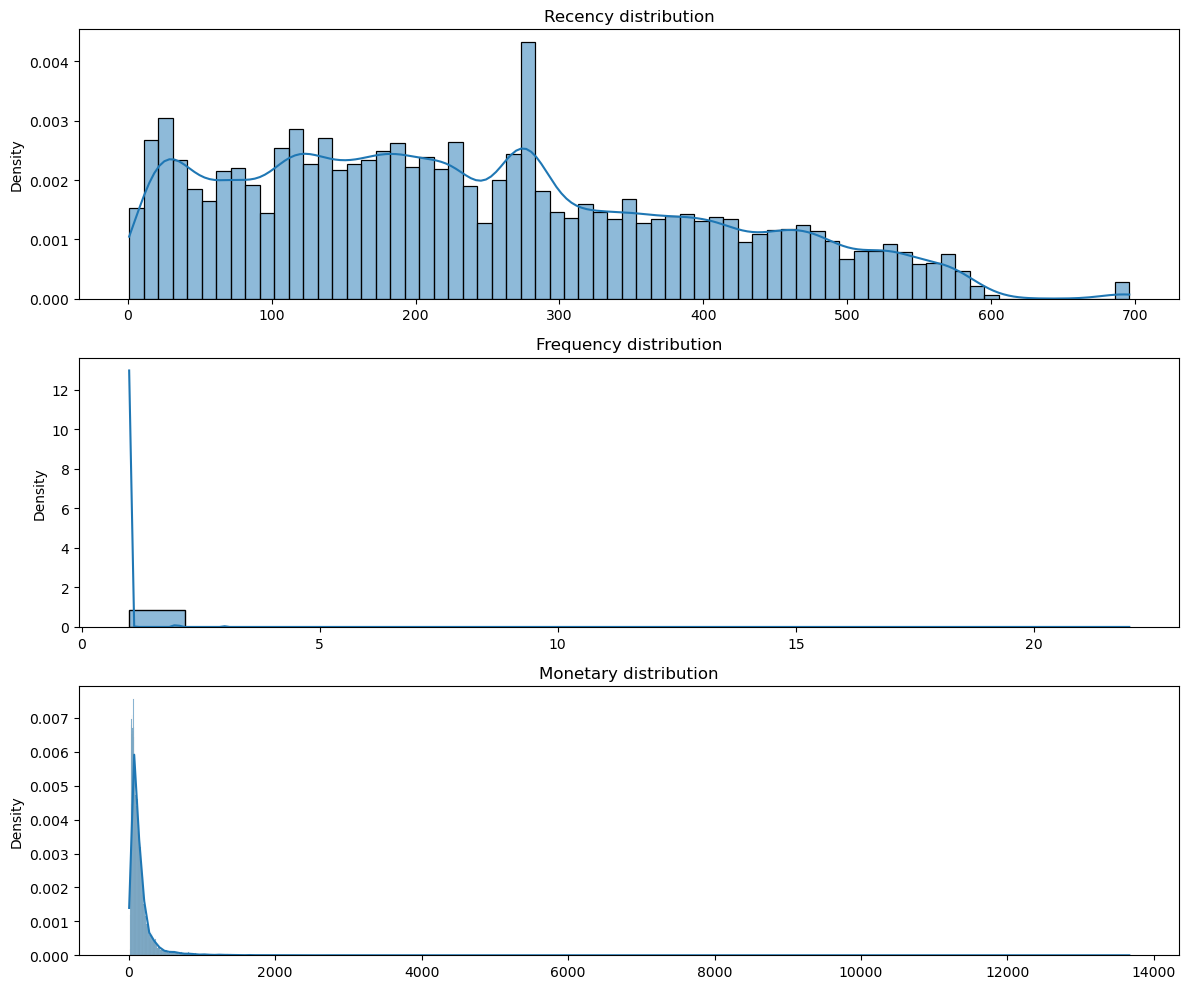

In [95]:
# Adjust the figure size
plt.figure(figsize=(12, 10))

#Recency
plt.subplot(3, 1, 1)
# Create histplot
sns.histplot(rfm_df_mts['recency'], kde=True, stat="density")
# Setting some visual options
plt.title('Recency distribution')
plt.xlabel(None)

#Frequency
plt.subplot(3, 1, 2)
# Create histplot
sns.histplot(rfm_df_mts['frequency'], kde=True, stat="density")
# Setting some visual options
plt.title('Frequency distribution')
plt.xlabel(None)

#Monetary
plt.subplot(3, 1, 3)
# Create histplot
sns.histplot(rfm_df_mts['monetary'], kde=True, stat="density")
# Setting some visual options
plt.title('Monetary distribution')
plt.xlabel(None)

plt.tight_layout()

### RFM Scoring 

In [92]:
quantiles = rfm_df_mts.quantile(q = [0.20, 0.40, 0.60, 0.80])
quantiles = quantiles.to_dict()

In [ ]:
# Create function to define scoring criteria
def RScore(x,p,d):
     if x <= d[p][0.20]:
         return 5
     elif x <= d[p][0.40]:
         return 4
     elif x <= d[p][0.60]:
         return 3
     elif x<=d[p][0.80]:
         return 2
     else:
         return 1

def FMScore(x, p, d):
    if x <= d[p][0.20]:
        return 1
    elif x <= d[p][0.40]:
        return 2
    elif x <= d[p][0.60]:
        return 3
    elif x<=d[p][0.80]:
        return 4
    else:
        return 5
    
# Copy existing dataFrame into new dataFrame
rfm_df_score = rfm_df_mts.copy()
# Calculate R, F, and M score
rfm_df_score['recency_quartile'] = rfm_df_score['recency'].apply(RScore, args=('recency', quantiles,))
rfm_df_score['frequency_quartile'] = rfm_df_score['frequency'].apply(FMScore, args=('frequency', quantiles,))
rfm_df_score['monetary_quartile'] = rfm_df_score['monetary'].apply(FMScore, args=('monetary', quantiles,))
# Display overall score by combining individual score
rfm_df_score['rfm_score'] = rfm_df_score['recency_quartile'].astype(str) + rfm_df_score['frequency_quartile'].astype(str) + rfm_df_score['monetary_quartile'].astype(str)
rfm_df_score.head()

### Segmentations of RFM

In [ ]:
# List all score and segment into dictionary
label = {
    r'111|112|121|131|141|151': 'Lost customers',
    r'332|322|233|232|223|222|132|123|122|212|211': 'Hibernating customers',
    r'155|154|144|214|215|115|114|113': 'Cannot Lose Them',
    r'255|254|245|244|253|252|243|242|235|234|225|224|153|152|145|143|142|135|134|133|125|124': 'At Risk',
    r'331|321|312|221|213|231|241|251': 'About To Sleep',
    r'535|534|443|434|343|334|325|324': 'Need Attention',
    r'525|524|523|522|521|515|514|513|425|424|413|414|415|315|314|313': 'Promising',
    r'512|511|422|421|412|411|311': 'New Customers',
    r'553|551|552|541|542|533|532|531|452|451|442|441|431|453|433|432|423|353|352|351|342|341|333|323': 'Potential Loyalist',
    r'543|444|435|355|354|345|344|335': 'Loyal',
    r'555|554|544|545|454|455|445': 'Champions'
}
# Copy existing dataFrame into new dataFrame
rfm_df_segment = rfm_df_score.copy()
# Replace all instances of RFM score
rfm_df_segment['segments'] = rfm_df_segment['rfm_score'].replace(label, regex=True)
# Count all instrument in segments column
rfm_df_segment['segments'].value_counts()

### Data Analytics Result of RFM

In [ ]:
# Adjust the figure size
plt.figure(figsize = (10, 8))

# Calculate total customer per segment (%) into new column
data = (rfm_df_segment['segments'].value_counts(normalize=True)*100).reset_index(name = "percentage")
ax = sns.barplot(x = data['percentage'], y = data['index'], data = data, palette = "cool")

# Create bar plot
for i, v in enumerate(data['percentage']):
  ax.text(v, i+0.20, "{:.2f}".format(v)+"%", color = 'black', ha = 'left')

# Setting some visual options
plt.ylabel(None)
plt.xlabel('Customer distribution (%)', fontdict = {'fontsize': 12})
plt.title('Comparison of Customer Segments', fontdict = {'fontsize': 18}, pad = 12)

plt.show()